# Heart Failure Prediction

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#importing data
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
#checking null values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Meaning of Variables:
Age - Self Explanatory

Anaemia - Is 1 or 0 with 1 being the patient does have this condition. Anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues.

Creatinine Phosphokinase - Level of CPK enzyme in the blood

Diabetes - Is a 1 or 0 - whether the patient suffers from diabetes or not - similar to anaemia

Ejection Fraction - Is a percentage (numerical between 0 to 100) Ejection fraction is a measurement of the percentage of blood leaving your heart each time it contracts.

High Blood Pressure - Is a 1 or 0 - whether patient suffers from high blood pressure

Platelets - no. of platelets in the blood

Serum Creatine - Level of Creatine produced from the kidneys in the blood

Serum Sodium - Level of Sodium in the blood

Sex - Self Explanatory - assuming 1 is male and 0 is female

Smoking - Self Explanatory - assuming 1 is smokes and 2 is doesn't smoke

Time - Follow up days

Death Event - whether patient died during follow up period

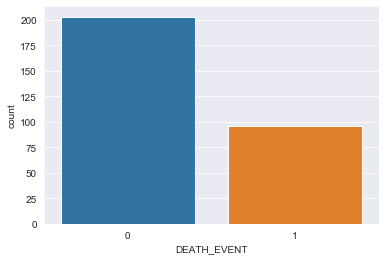

In [6]:
sb.set_style('darkgrid')
sb.countplot(x='DEATH_EVENT',data= data)

out of 299 patients 96 patients died

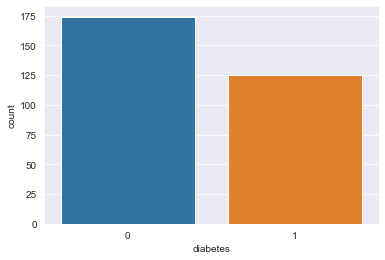

In [7]:
#count of diabetic patients 
sb.set_style('darkgrid')
sb.countplot(x='diabetes',data= data)

125 patients are diabetic

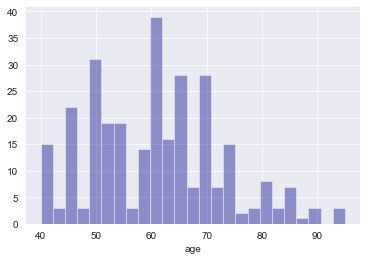

In [8]:
#To find age of most patients
sb.distplot(data['age'],kde=False,color='darkblue',bins=25)

majority patients are in the age of 50-70.

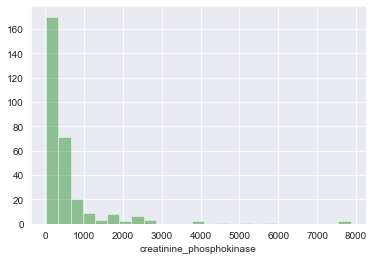

In [9]:
sb.distplot(data['creatinine_phosphokinase'],kde=False,color='green',bins=25)

 most patients creatinine_phosphokinase is below 1000

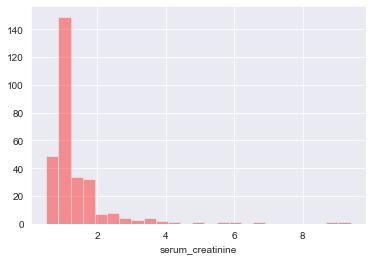

In [10]:
sb.distplot(data['serum_creatinine'],kde=False,color='red',bins=25)

most patients serum_creatinine is below 2

In [11]:
a = (len(data[data['anaemia'] == 1]))/len(data['anaemia'])
b = (len(data[data['diabetes'] == 1]))/len(data['diabetes'])
c = (len(data[data['high_blood_pressure'] == 1]))/len(data['high_blood_pressure'])
d = (len(data[data['sex'] == 1]))/len(data['sex'])
e = (len(data[data['smoking'] == 1]))/len(data['smoking'])

data1 = {'Anaemia': a, 'Diabetes': b, 'High Blood Pressure': c, 'Sex': d, 
       'Smoking': e}
x1 = pd.DataFrame(data1,index=[1])
x1

,Anaemia,Diabetes,High Blood Pressure,Sex,Smoking
1,0.431438,0.41806,0.351171,0.648829,0.32107


 Around 40% of patients  either  have  Anaemia or diabetes or both .

 Around 65% of the patients were male(consider male==1)
 
 Around a third of patients suffered from either High Blood Pressure, Smoking or both

In [12]:
#checking the effect of smoke,diabetes,gender,anaemia,high_blood_pressure on death event



data[['sex', 'DEATH_EVENT']].groupby(['sex'],as_index=False).mean()

,sex,DEATH_EVENT
0,0,0.323810
1,1,0.319588


In [13]:
data[['diabetes','DEATH_EVENT']].groupby(['diabetes'],as_index=False).mean()

,diabetes,DEATH_EVENT
0,0,0.321839
1,1,0.320000


In [14]:
data[['anaemia','DEATH_EVENT']].groupby(['anaemia'],as_index=False).mean()

,anaemia,DEATH_EVENT
0,0,0.294118
1,1,0.356589


In [15]:
data[['high_blood_pressure','DEATH_EVENT']].groupby(['high_blood_pressure'],as_index=False).mean()

,high_blood_pressure,DEATH_EVENT
0,0,0.293814
1,1,0.371429


In [16]:
data[['smoking','DEATH_EVENT']].groupby(['smoking'],as_index=False).mean()

,smoking,DEATH_EVENT
0,0,0.325123
1,1,0.312500


from the above obsevation the effect of smoke,diabetes,gender,anaemia,high_blood_pressure on death_event is low.


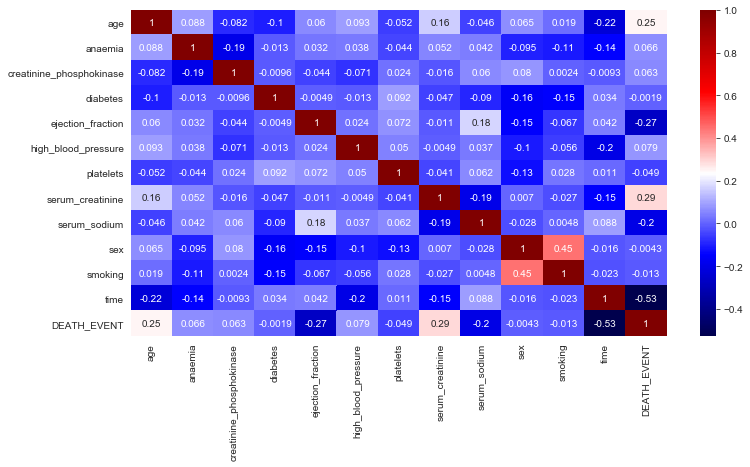

In [17]:
plt.figure(figsize=(12,6))
sb.heatmap(data.corr(),cmap='seismic' , annot = True)

we drop correlation less than 0.1

In [18]:
datacor = data.corr() 
data_target = abs(datacor["DEATH_EVENT"])
relevant_features = data_target[data_target>0.1]
relevant_features

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
serum_sodium         0.195204
time                 0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [19]:
#droping coloumns
data.drop('anaemia',axis=1,inplace=True)
data.drop('diabetes',axis=1,inplace=True)
data.drop('high_blood_pressure',axis=1,inplace=True)
data.drop('sex',axis=1,inplace=True)
data.drop('creatinine_phosphokinase',axis=1,inplace=True)
data.drop('platelets',axis=1,inplace=True)
data.drop('smoking',axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                299 non-null    float64
 1   ejection_fraction  299 non-null    int64  
 2   serum_creatinine   299 non-null    float64
 3   serum_sodium       299 non-null    int64  
 4   time               299 non-null    int64  
 5   DEATH_EVENT        299 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 14.1 KB


In [21]:
#split the data into X & Y
X = data.iloc[:,0:5].values
Y = data.iloc[:,-1].values


In [22]:
print(X)
print(Y)

[[ 75.   20.    1.9 130.    4. ]
 [ 55.   38.    1.1 136.    6. ]
 [ 65.   20.    1.3 129.    7. ]
 ...
 [ 45.   60.    0.8 138.  278. ]
 [ 45.   38.    1.4 140.  280. ]
 [ 50.   45.    1.6 136.  285. ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [23]:
#split the dataset into 80% train and 20% test

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=42)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
accuracy=accuracy_score(Y_test,pred)
accuracy

0.7833333333333333

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix =  confusion_matrix(Y_test,pred)

confusion_matrix

array([[34,  1],
       [12, 13]], dtype=int64)

In [27]:
print(Y_test)
print(pred)

[0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1]


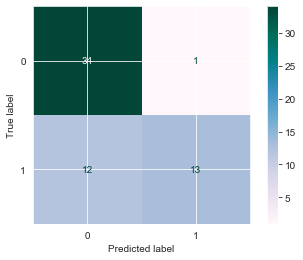

In [36]:
plot_confusion_matrix(model,X_test,Y_test,cmap='PuBuGn')
plt.show()

# KNN classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)


from sklearn.metrics import accuracy_score

pred = knn.predict(X_test)
accuracy=accuracy_score(Y_test,pred)
accuracy

0.75

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix =  confusion_matrix(Y_test,pred)

confusion_matrix

array([[32,  3],
       [12, 13]], dtype=int64)

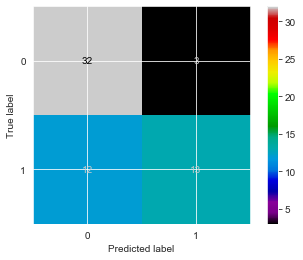

In [50]:
plot_confusion_matrix(knn,X_test,Y_test,cmap='nipy_spectral',)
plt.show()

# XGBoost model

In [57]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X, Y)
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
accuracy=accuracy_score(Y_test,pred)
accuracy

1.0

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix =  confusion_matrix(Y_test,pred)

confusion_matrix

array([[35,  0],
       [ 0, 25]], dtype=int64)

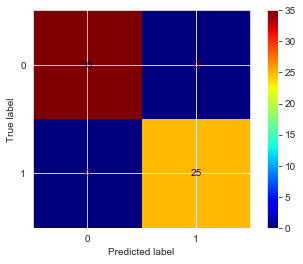

In [60]:
plot_confusion_matrix(model,X_test,Y_test,cmap='jet',)
plt.show()

# GaussianNB

In [61]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
pred = gauss.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)
accuracy

0.7166666666666667

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix =  confusion_matrix(Y_test,pred)

confusion_matrix

array([[34,  1],
       [16,  9]], dtype=int64)

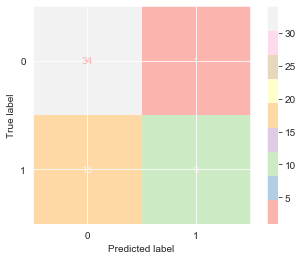

In [81]:
plot_confusion_matrix(gauss,X_test,Y_test,cmap='Pastel1',)
plt.show()

# DecisionTreeClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)

pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)
accuracy

0.7333333333333333

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix =  confusion_matrix(Y_test,pred)

confusion_matrix

array([[30,  5],
       [11, 14]], dtype=int64)

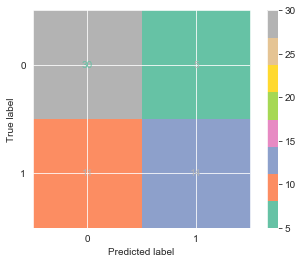

In [80]:
plot_confusion_matrix(tree,X_test,Y_test,cmap='Set2',)
plt.show()

# SVC(kernel='linear')

In [72]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)

pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)
accuracy

0.8

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix =  confusion_matrix(Y_test,pred)

confusion_matrix

array([[33,  2],
       [10, 15]], dtype=int64)

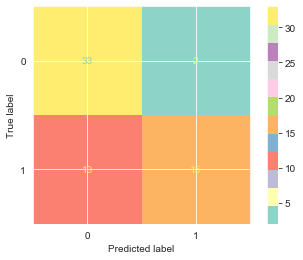

In [79]:
plot_confusion_matrix(svc,X_test,Y_test,cmap='Set3',)
plt.show()

# RandomForestClassifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10)
forest.fit(X_train,Y_train)

pred = forest.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)
accuracy

0.7666666666666667

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix =  confusion_matrix(Y_test,pred)

confusion_matrix

array([[33,  2],
       [12, 13]], dtype=int64)

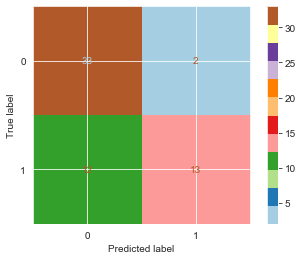

In [82]:
plot_confusion_matrix(forest,X_test,Y_test,cmap='Paired',)
plt.show()